# Portfolio Analyze Project

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation
import numpy as np

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 4


True

## Part 1 - Get API data

### Collect Investments Data Using Alpaca: stocks, bonds

In [3]:
# Set Alpaca API key and secret
alpaca_api = os.getenv('ALPACA_API_KEY')
alpaca_secret = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api, alpaca_secret, api_version='v2')

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-4-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [5]:
# Format current date as ISO format
current_date = pd.Timestamp('2020-12-11', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["KO", "PFE", 'O', 'GILD', 'D', 'MAIN', 'SBUX', 
           'TWTR', 'WKHS', 'CTSH']

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for stocks
ticker_data = api.get_barset(tickers, timeframe, start=current_date).df

# Preview DataFrame
ticker_data.head()

CTSH                                    D  \
                              open   high    low  close   volume   open   
2020-12-11 00:00:00-05:00  78.5623  79.95  78.19  78.45  2977490  73.91   
2020-12-14 00:00:00-05:00  79.0000  79.49  78.61  79.19  1968615  75.38   
2020-12-15 00:00:00-05:00  80.1041  80.53  79.07  80.53  2314135  75.09   

                                                          GILD                 \
                            high    low  close   volume   open   high     low   
2020-12-11 00:00:00-05:00  75.04  73.91  74.91  3302914  60.22  60.81  60.090   
2020-12-14 00:00:00-05:00  75.52  74.38  74.47  3408927  60.39  60.42  59.750   
2020-12-15 00:00:00-05:00  75.69  74.52  75.48  3045913  59.82  60.07  59.265   

                                              KO                        \
                           close   volume   open   high     low  close   
2020-12-11 00:00:00-05:00  60.77  6455426  52.80  53.54  52.780  53.35   
2020-12-14 00:00:00-05:00  59.83  9349437  53.65  53.84  53.180  53.27   
2020-12-15 00:00:00-05:00  59.45  6918484  53.79  54.22  53.595  53.85   

                                      MAIN                               \
                             volume   open   high    low  close  volume   
2020-12-11 00:00:00-05:00  8073524   31.37  31.55  31.25  31.36  241599   
2020-12-14 00:00:00-05:00  13540174  31.52  31.70  31.36  31.52  326699   
2020-12-15 00:00:00-05:00  13126457  31.79  31.90  31.45  31.90  381043   

                               O                                    PFE  \
                            open   high      low  close   volume   open   
2020-12-11 00:00:00-05:00  60.00  60.60  59.8800  60.46  2376688  41.97   
2020-12-14 00:00:00-05:00  60.90  61.90  60.4200  60.62  2471279  41.62   
2020-12-15 00:00:00-05:00  60.87  61.75  60.3596  61.75  1915684  39.06   

                                                             SBUX            \
                            high    low  close    volume     open      high   
2020-12-11 00:00:00-05:00  42.07  40.69  41.12  52667476  104.405  104.7800   
2020-12-14 00:00:00-05:00  41.66  39.07  39.21  84394301  103.830  104.7100   
2020-12-15 00:00:00-05:00  39.18  38.21  38.72  58936992  104.240  104.8586   

                                                     TWTR                   \
                              low   close   volume   open     high     low   
2020-12-11 00:00:00-05:00  102.33  103.00  5365947  50.62  52.4500  49.970   
2020-12-14 00:00:00-05:00  103.25  103.31  3727766  51.97  53.4843  51.795   
2020-12-15 00:00:00-05:00  103.78  104.19  3435844  52.02  52.9600  51.610   

                                               WKHS                       \
                             close    volume   open   high    low  close   
2020-12-11 00:00:00-05:00  51.4500  17071509  21.25  22.72  20.97  21.78   
2020-12-14 00:00:00-05:00  52.0199  13178769  21.90  22.29  21.03  21.39   
2020-12-15 00:00:00-05:00  52.8200  8561784   21.61  22.45  21.40  21.85   

                                     
                             volume  
2020-12-11 00:00:00-05:00  13217289  
2020-12-14 00:00:00-05:00  7970608   
2020-12-15 00:00:00-05:00  8443487

In [6]:
# Pick close prices
new_data = pd.concat([ticker_data['KO']['close'], ticker_data['PFE']['close'], 
                      ticker_data['O']['close'], ticker_data['GILD']['close'], 
                      ticker_data['D']['close'], ticker_data['MAIN']['close'],
                      ticker_data['SBUX']['close'], ticker_data['TWTR']['close'],
                      ticker_data['WKHS']['close'], ticker_data['CTSH']['close']],
                     axis=1)
new_data

,close,close,close,close,close,close,close,close,close,close
2020-12-11 00:00:00-05:00,53.35,41.12,60.46,60.77,74.91,31.36,103.00,51.4500,21.78,78.45
2020-12-14 00:00:00-05:00,53.27,39.21,60.62,59.83,74.47,31.52,103.31,52.0199,21.39,79.19
2020-12-15 00:00:00-05:00,53.85,38.72,61.75,59.45,75.48,31.90,104.19,52.8200,21.85,80.53


In [7]:
new_data.columns = ["KO", "PFE", 'O', 'GILD', 'D', 'MAIN', 'SBUX', 
                    'TWTR', 'WKHS', 'CTSH']
new_data

,KO,PFE,O,GILD,D,MAIN,SBUX,TWTR,WKHS,CTSH
2020-12-11 00:00:00-05:00,53.35,41.12,60.46,60.77,74.91,31.36,103.00,51.4500,21.78,78.45
2020-12-14 00:00:00-05:00,53.27,39.21,60.62,59.83,74.47,31.52,103.31,52.0199,21.39,79.19
2020-12-15 00:00:00-05:00,53.85,38.72,61.75,59.45,75.48,31.90,104.19,52.8200,21.85,80.53


In [8]:
# Setting bonds
bond_tickers = ['TLT', 'BLV', 'IGLB']

# Get current closing prices for stocks
ticker_bond_data = api.get_barset(bond_tickers, timeframe, start=current_date).df

# Preview DataFrame
ticker_bond_data.head()

BLV                                       IGLB  \
                             open      high       low   close  volume   open   
2020-12-11 00:00:00-05:00  112.32  112.7000  112.1401  112.47  280136  72.50   
2020-12-14 00:00:00-05:00  111.97  112.4900  111.7000  112.30  193347  72.29   
2020-12-15 00:00:00-05:00  112.20  112.4415  112.0500  112.27  188876  72.36   

                                                           TLT          \
                            high    low  close  volume    open    high   
2020-12-11 00:00:00-05:00  72.63  72.28  72.63  199039  158.65  159.39   
2020-12-14 00:00:00-05:00  72.61  72.24  72.48  477420  157.49  158.69   
2020-12-15 00:00:00-05:00  72.69  72.34  72.62  452043  157.78  158.39   

                                                    
                              low   close   volume  
2020-12-11 00:00:00-05:00  158.32  158.76  7923178  
2020-12-14 00:00:00-05:00  157.11  158.32  7085285  
2020-12-15 00:00:00-05:00  157.31  157.80  5695195

In [9]:
# Selecting closing price for bonds
close_bonds = pd.concat([ticker_bond_data['BLV']['close'], ticker_bond_data['IGLB']['close'], 
                         ticker_bond_data['TLT']['close']], axis=1)
close_bonds.columns = ['BLV', 'IGLB', 'TLT']
close_bonds

,BLV,IGLB,TLT
2020-12-11 00:00:00-05:00,112.47,72.63,158.76
2020-12-14 00:00:00-05:00,112.30,72.48,158.32
2020-12-15 00:00:00-05:00,112.27,72.62,157.80


In [10]:
bond_index = pd.read_csv('Bond_index.csv', index_col='Date', parse_dates=True, 
                         infer_datetime_format=True)
bond_index = bond_index.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
bond_index = bond_index.rename(columns ={'Adj Close':'VBTLX'})

# Removing time from DateTime
bond_index.index = pd.to_datetime(bond_index.index).date
bond_index.index.name='Date'

# Preview DataFrame
bond_index.head()

,VBTLX
Date,
2014-10-13,162.770004
2014-10-14,159.460007
2014-10-15,160.729996
2014-10-16,163.250000
2014-10-17,164.750000


In [11]:
# Get current closing prices for SP
sp500_data = pd.read_csv('sp500_history.csv', index_col='Date', parse_dates=True, 
                         infer_datetime_format=True)

sp500_data = sp500_data.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
sp500_data = sp500_data.rename(columns ={'Adj Close':'S&P500'})

# Removing time from DateTime
sp500_data.index = pd.to_datetime(sp500_data.index).date
sp500_data.index.name='Date'

# Preview DataFrame
sp500_data.head()

,S&P500
Date,
2014-12-12,2002.329956
2014-12-15,1989.630005
2014-12-16,1972.739990
2014-12-17,2012.890015
2014-12-18,2061.229980


In [12]:
# Import crypto data 
btc_data = pd.read_csv('BTC.csv', parse_dates=True, infer_datetime_format=True)
eth_data = pd.read_csv('ETH.csv', parse_dates=True, infer_datetime_format=True)
xrp_data = pd.read_csv('XRP.csv', parse_dates=True, infer_datetime_format=True)

btc_data = btc_data.set_index('Date')
eth_data = eth_data.set_index('Date')
xrp_data = xrp_data.set_index('Date')

In [13]:
# Removing time from DateTime
btc_data.index = pd.to_datetime(btc_data.index).date
btc_data.index.name='Date'
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [14]:
# Removing time from DateTime
eth_data.index = pd.to_datetime(eth_data.index).date
eth_data.index.name='Date'
eth_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100


In [15]:
# Removing time from DateTime
xrp_data.index = pd.to_datetime(xrp_data.index).date
xrp_data.index.name='Date'

xrp_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,0.005123,0.005803,0.005123,0.005399,0.005399,1281960
2014-09-18,0.005398,0.005521,0.005091,0.005135,0.005135,491147
2014-09-19,0.005134,0.005167,0.004873,0.004942,0.004942,407109
2014-09-20,0.004942,0.004954,0.004736,0.004772,0.004772,322621
2014-09-21,0.004768,0.004791,0.004540,0.004570,0.004570,309571


In [16]:
#get pct change only
all_crypto = pd.concat([btc_data['Adj Close'], eth_data['Adj Close'], xrp_data['Adj Close']],
                      axis=1, join='inner')
all_crypto.columns = ['BTC', 'ETH', 'XRP']
all_crypto.index = pd.to_datetime(all_crypto.index).date
all_crypto.head()

,BTC,ETH,XRP
2015-08-07,279.584991,2.772120,0.008152
2015-08-08,260.997009,0.753325,0.008476
2015-08-09,265.083008,0.701897,0.008808
2015-08-10,264.470001,0.708448,0.008750
2015-08-11,270.385986,1.067860,0.008591


In [17]:
# Compute the current value of shares
bonds_investment = 10000
crypto_investment = 20000
stocks_investment = 20000

In [18]:
#We'll be using weights in our project, with the initial investment 
investment_per_stock = round(stocks_investment / len(new_data.columns),2)
investment_per_stock

investment_per_crypto = round(crypto_investment / len(all_crypto.columns),2)
investment_per_crypto

investment_per_bond = round(bonds_investment / len(close_bonds.columns),2)
investment_per_bond

print(investment_per_stock, investment_per_crypto, investment_per_bond)

2000.0 6666.67 3333.33


## Sharpe Ratios

In [19]:
# Historical crypto data
start_date = pd.Timestamp('2015-12-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-12-10', tz='America/New_York').isoformat()

In [20]:
##get pct change only
crypto_pct_change = all_crypto.pct_change().dropna()
crypto_pct_change.head()

,BTC,ETH,XRP
2015-08-08,-0.066484,-0.728249,0.039745
2015-08-09,0.015655,-0.068268,0.039169
2015-08-10,-0.002313,0.009333,-0.006585
2015-08-11,0.022369,0.507323,-0.018171
2015-08-12,-0.014831,0.140075,-0.037248


In [21]:
crypto_pct_change.index = pd.to_datetime(crypto_pct_change.index).date
crypto_pct_change.index.name='Date'
crypto_pct_change.columns = ['BTC', 'ETH', 'XRP']
crypto_pct_change.head() 

,BTC,ETH,XRP
Date,,,
2015-08-08,-0.066484,-0.728249,0.039745
2015-08-09,0.015655,-0.068268,0.039169
2015-08-10,-0.002313,0.009333,-0.006585
2015-08-11,0.022369,0.507323,-0.018171
2015-08-12,-0.014831,0.140075,-0.037248


In [22]:
# Historical bonds data
bonds_historical = api.get_barset(bond_tickers, timeframe, start=start_date, end=end_date,).df
bonds_historical.head()

BLV                                      IGLB  \
                            open     high      low  close    volume   open   
2015-12-10 00:00:00-05:00  88.27  88.4400  88.0701  88.28  155466.0  56.62   
2015-12-11 00:00:00-05:00  88.75  88.8600  88.4000  88.83  160535.0  56.72   
2015-12-14 00:00:00-05:00  88.44  88.6000  87.3300  87.67  307403.0  56.32   
2015-12-15 00:00:00-05:00  87.32  87.7700  87.2700  87.73  145482.0  55.79   
2015-12-16 00:00:00-05:00  87.50  88.1799  87.0700  87.60  54229.0   55.90   

                                                                   TLT  \
                              high      low    close    volume    open   
2015-12-10 00:00:00-05:00  56.7099  56.4600  56.4800  113110.0  121.79   
2015-12-11 00:00:00-05:00  56.7368  56.4500  56.5000  82668.0   123.05   
2015-12-14 00:00:00-05:00  56.4800  55.8500  55.8701  289998.0  123.08   
2015-12-15 00:00:00-05:00  56.0500  55.7600  55.9001  304139.0  121.02   
2015-12-16 00:00:00-05:00  56.1600  55.7101  55.8700  112087.0  121.07   

                                                              
                             high     low   close     volume  
2015-12-10 00:00:00-05:00  122.03  121.49  121.82  3612478.0  
2015-12-11 00:00:00-05:00  124.10  122.87  123.75  9357518.0  
2015-12-14 00:00:00-05:00  123.15  121.75  122.14  8363553.0  
2015-12-15 00:00:00-05:00  121.60  120.83  121.48  6511469.0  
2015-12-16 00:00:00-05:00  122.17  120.50  121.17  9083300.0

In [23]:
# Select only close prices for bonds
bonds_close_only = pd.concat([bonds_historical['BLV']['close'], 
                              bonds_historical['IGLB']['close'], 
                              bonds_historical['TLT']['close']], axis=1)
bonds_close_only.columns = ['BLV', 'IGLB', 'TLT']

# Removing time from DateTime
bonds_close_only.index = pd.to_datetime(bonds_close_only.index).date
bonds_close_only.index.name='Date'
bonds_close_only.head()

,BLV,IGLB,TLT
Date,,,
2015-12-10,88.28,56.4800,121.82
2015-12-11,88.83,56.5000,123.75
2015-12-14,87.67,55.8701,122.14
2015-12-15,87.73,55.9001,121.48
2015-12-16,87.60,55.8700,121.17


In [24]:
bonds_returns = bonds_close_only.pct_change().dropna()

bonds_returns.head()

,BLV,IGLB,TLT
Date,,,
2015-12-11,0.006230,0.000354,0.015843
2015-12-14,-0.013059,-0.011149,-0.013010
2015-12-15,0.000684,0.000537,-0.005404
2015-12-16,-0.001482,-0.000538,-0.002552
2015-12-17,0.006050,0.006266,0.011471


In [25]:
# Removing time from DateTime
bonds_returns.index = pd.to_datetime(bonds_returns.index).date
bonds_returns.index.name = 'Date'
bonds_returns.columns = ['BLV', 'IGLB', 'TLT']
bonds_returns.head() 

,BLV,IGLB,TLT
Date,,,
2015-12-11,0.006230,0.000354,0.015843
2015-12-14,-0.013059,-0.011149,-0.013010
2015-12-15,0.000684,0.000537,-0.005404
2015-12-16,-0.001482,-0.000538,-0.002552
2015-12-17,0.006050,0.006266,0.011471


In [26]:
# Get the bond index returns and concat with bonds
bond_index_returns = bond_index.pct_change().dropna()

# Removing time from DateTime
bond_index_returns.index = pd.to_datetime(bond_index_returns.index).date
bond_index_returns.index.name='Date'
bond_index_returns.head() 

,VBTLX
Date,
2014-10-14,-0.020335
2014-10-15,0.007964
2014-10-16,0.015678
2014-10-17,0.009188
2014-10-20,0.020941


In [27]:
all_bonds_returns = pd.concat([bond_index_returns, bonds_returns], join='inner', axis=1)
all_bonds_returns.head()

,VBTLX,BLV,IGLB,TLT
Date,,,,
2015-12-11,0.002292,0.006230,0.000354,0.015843
2015-12-14,-0.001436,-0.013059,-0.011149,-0.013010
2015-12-15,-0.008414,0.000684,0.000537,-0.005404
2015-12-16,0.014500,-0.001482,-0.000538,-0.002552
2015-12-17,-0.016516,0.006050,0.006266,0.011471


In [28]:
# Historical stock data
stock_historical = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

stock_historical.head()

CTSH                                      D  \
                            open   high    low  close     volume   open   
2015-12-10 00:00:00-05:00  59.63  60.06  59.27  59.52  2880954.0  66.13   
2015-12-11 00:00:00-05:00  58.81  59.13  57.78  58.29  4408789.0  64.92   
2015-12-14 00:00:00-05:00  58.89  59.77  58.67  59.75  5236838.0  64.81   
2015-12-15 00:00:00-05:00  60.34  61.05  59.59  59.66  4464072.0  65.60   
2015-12-16 00:00:00-05:00  60.05  62.52  59.95  62.41  5265173.0  66.50   

                                                              GILD           \
                             high    low  close     volume    open     high   
2015-12-10 00:00:00-05:00  66.240  65.14  65.20  1559244.0  102.45  103.060   
2015-12-11 00:00:00-05:00  65.444  64.54  64.89  1666716.0  101.39  102.465   
2015-12-14 00:00:00-05:00  65.440  64.55  65.42  2029797.0  99.94   100.930   
2015-12-15 00:00:00-05:00  66.695  65.42  66.15  1739872.0  101.74  103.000   
2015-12-16 00:00:00-05:00  67.630  66.31  67.57  2559933.0  103.18  103.490   

                                                       KO                 \
                              low   close   volume   open   high     low   
2015-12-10 00:00:00-05:00  101.56  102.63  6273977  42.73  43.07  42.525   
2015-12-11 00:00:00-05:00  99.67   100.02  7656568  42.63  42.83  42.140   
2015-12-14 00:00:00-05:00  98.66   100.50  7716919  42.31  42.76  41.970   
2015-12-15 00:00:00-05:00  101.44  102.02  8995081  42.84  43.24  42.760   
2015-12-16 00:00:00-05:00  101.64  103.32  6391011  43.25  43.91  43.250   

                                               MAIN                           \
                           close      volume   open     high    low    close   
2015-12-10 00:00:00-05:00  42.74  12983602.0  30.14  31.0200  29.86  30.9200   
2015-12-11 00:00:00-05:00  42.28  14013678.0  30.62  30.9100  29.92  30.1200   
2015-12-14 00:00:00-05:00  42.43  17901923.0  30.20  30.4600  28.74  29.0799   
2015-12-15 00:00:00-05:00  43.07  15696021.0  28.76  29.4099  28.52  29.0300   
2015-12-16 00:00:00-05:00  43.83  19790291.0  29.23  29.3800  28.70  29.2600   

                                         O                                   \
                             volume   open     high    low   close   volume   
2015-12-10 00:00:00-05:00  337722.0  49.57  49.9200  48.92  48.950  1535568   
2015-12-11 00:00:00-05:00  320730.0  48.63  49.0195  48.37  48.640  1878354   
2015-12-14 00:00:00-05:00  581378.0  48.57  49.3800  48.51  49.340  1679383   
2015-12-15 00:00:00-05:00  383071.0  49.78  50.3800  49.63  49.945  1776713   
2015-12-16 00:00:00-05:00  267432.0  50.20  51.2640  50.10  51.230  1884046   

                             PFE                                   SBUX  \
                            open   high     low  close    volume   open   
2015-12-10 00:00:00-05:00  32.43  32.72  32.240  32.37  39717813  61.13   
2015-12-11 00:00:00-05:00  32.11  32.23  31.970  32.07  34679238  60.88   
2015-12-14 00:00:00-05:00  31.99  32.21  31.840  32.18  32025435  60.04   
2015-12-15 00:00:00-05:00  32.59  32.82  32.165  32.25  41728736  60.55   
2015-12-16 00:00:00-05:00  32.43  32.67  31.990  32.57  40161850  60.32   

                                                           TWTR                \
                            high    low  close    volume   open   high    low   
2015-12-10 00:00:00-05:00  62.14  61.01  61.87  5460861   24.36  26.25  24.34   
2015-12-11 00:00:00-05:00  61.19  59.60  59.80  9810207   25.91  26.20  24.80   
2015-12-14 00:00:00-05:00  60.14  58.61  59.93  11284005  24.68  24.94  23.70   
2015-12-15 00:00:00-05:00  60.68  59.97  59.98  6612039   24.52  24.69  23.70   
2015-12-16 00:00:00-05:00  60.50  59.51  60.36  8170418   23.96  24.48  23.80   

                                              WKHS                            
                            close      volume open high   low close   volume  
2015-12-10 00:00:00-05:00  25.940  26919155.0  6

In [29]:
# Select only close prices
stocks_close_only = pd.concat([stock_historical['KO']['close'], 
                               stock_historical['PFE']['close'], 
                               stock_historical['O']['close'], 
                               stock_historical['GILD']['close'], 
                               stock_historical['D']['close'],
                               stock_historical['MAIN']['close'],
                               stock_historical['SBUX']['close'],
                               stock_historical['TWTR']['close'],
                               stock_historical['WKHS']['close'],
                               stock_historical['CTSH']['close']], axis=1)
stocks_close_only.columns = ['KO', 'PFE', 'O', 'GILD', 'D', 'MAIN',
                             'SBUX', 'TWTR', 'WKHS', 'CTSH']
stocks_close_only.fillna(inplace=True, method='ffill')
stocks_close_only.head()

,KO,PFE,O,GILD,D,MAIN,SBUX,TWTR,WKHS,CTSH
2015-12-10 00:00:00-05:00,42.74,32.37,48.950,102.63,65.20,30.9200,61.87,25.940,6.4,59.52
2015-12-11 00:00:00-05:00,42.28,32.07,48.640,100.02,64.89,30.1200,59.80,24.850,6.4,58.29
2015-12-14 00:00:00-05:00,42.43,32.18,49.340,100.50,65.42,29.0799,59.93,24.920,6.4,59.75
2015-12-15 00:00:00-05:00,43.07,32.25,49.945,102.02,66.15,29.0300,59.98,23.960,6.4,59.66
2015-12-16 00:00:00-05:00,43.83,32.57,51.230,103.32,67.57,29.2600,60.36,24.295,6.4,62.41


In [30]:
#Fix the dates
stocks_close_only.index = pd.to_datetime(stocks_close_only.index).date
stocks_close_only.index.name = 'Date'
stocks_close_only.head()

,KO,PFE,O,GILD,D,MAIN,SBUX,TWTR,WKHS,CTSH
Date,,,,,,,,,,
2015-12-10,42.74,32.37,48.950,102.63,65.20,30.9200,61.87,25.940,6.4,59.52
2015-12-11,42.28,32.07,48.640,100.02,64.89,30.1200,59.80,24.850,6.4,58.29
2015-12-14,42.43,32.18,49.340,100.50,65.42,29.0799,59.93,24.920,6.4,59.75
2015-12-15,43.07,32.25,49.945,102.02,66.15,29.0300,59.98,23.960,6.4,59.66
2015-12-16,43.83,32.57,51.230,103.32,67.57,29.2600,60.36,24.295,6.4,62.41


In [31]:
stock_returns = stocks_close_only.pct_change().dropna()
stock_returns.head() 

,KO,PFE,O,GILD,D,MAIN,SBUX,TWTR,WKHS,CTSH
Date,,,,,,,,,,
2015-12-11,-0.010763,-0.009268,-0.006333,-0.025431,-0.004755,-0.025873,-0.033457,-0.042020,0.0,-0.020665
2015-12-14,0.003548,0.003430,0.014391,0.004799,0.008168,-0.034532,0.002174,0.002817,0.0,0.025047
2015-12-15,0.015084,0.002175,0.012262,0.015124,0.011159,-0.001716,0.000834,-0.038523,0.0,-0.001506
2015-12-16,0.017646,0.009922,0.025728,0.012743,0.021466,0.007923,0.006335,0.013982,0.0,0.046095
2015-12-17,-0.007529,-0.007062,-0.004685,-0.009292,-0.000592,0.000684,-0.014082,-0.040543,0.0,-0.031726


In [32]:
stock_returns.index = pd.to_datetime(stock_returns.index).date
stock_returns.index.name = 'Date'
stock_returns.head()

,KO,PFE,O,GILD,D,MAIN,SBUX,TWTR,WKHS,CTSH
Date,,,,,,,,,,
2015-12-11,-0.010763,-0.009268,-0.006333,-0.025431,-0.004755,-0.025873,-0.033457,-0.042020,0.0,-0.020665
2015-12-14,0.003548,0.003430,0.014391,0.004799,0.008168,-0.034532,0.002174,0.002817,0.0,0.025047
2015-12-15,0.015084,0.002175,0.012262,0.015124,0.011159,-0.001716,0.000834,-0.038523,0.0,-0.001506
2015-12-16,0.017646,0.009922,0.025728,0.012743,0.021466,0.007923,0.006335,0.013982,0.0,0.046095
2015-12-17,-0.007529,-0.007062,-0.004685,-0.009292,-0.000592,0.000684,-0.014082,-0.040543,0.0,-0.031726


In [33]:
sp500_returns = sp500_data.pct_change().dropna()
sp500_returns.columns = ['S&P 500']
sp500_returns.head() 

,S&P 500
Date,
2014-12-15,-0.006343
2014-12-16,-0.008489
2014-12-17,0.020352
2014-12-18,0.024015
2014-12-19,0.004570


In [34]:
allstock_returns = pd.concat([sp500_returns, stock_returns], join='inner', axis=1)
allstock_returns.head()

,S&P 500,KO,PFE,O,GILD,D,MAIN,SBUX,TWTR,WKHS,CTSH
Date,,,,,,,,,,,
2015-12-11,-0.019423,-0.010763,-0.009268,-0.006333,-0.025431,-0.004755,-0.025873,-0.033457,-0.042020,0.0,-0.020665
2015-12-14,0.004756,0.003548,0.003430,0.014391,0.004799,0.008168,-0.034532,0.002174,0.002817,0.0,0.025047
2015-12-15,0.010619,0.015084,0.002175,0.012262,0.015124,0.011159,-0.001716,0.000834,-0.038523,0.0,-0.001506
2015-12-16,0.014515,0.017646,0.009922,0.025728,0.012743,0.021466,0.007923,0.006335,0.013982,0.0,0.046095
2015-12-17,-0.015041,-0.007529,-0.007062,-0.004685,-0.009292,-0.000592,0.000684,-0.014082,-0.040543,0.0,-0.031726


In [35]:
sharpe_stocks = (allstock_returns.mean()*252)/(allstock_returns.std() * np.sqrt(252))
sharpe_stocks.sort_values(inplace=True)

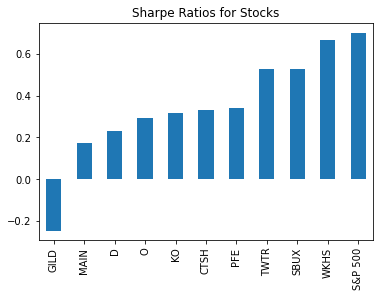

In [36]:
sharpe_stocks.plot(kind='bar', title='Sharpe Ratios for Stocks')

In [37]:
# Sharpes for bonds
sharpe_bonds = (all_bonds_returns.mean()*252)/(all_bonds_returns.std()*np.sqrt(252))
sharpe_bonds.sort_values(inplace=True)

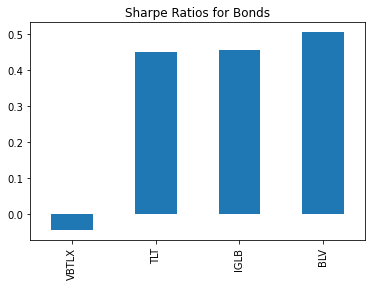

In [38]:
sharpe_bonds.plot(kind='bar', title='Sharpe Ratios for Bonds')

In [39]:
# Sharpe for crypto
sharpe_crypto = (crypto_pct_change.mean()*365)/(crypto_pct_change.std()*np.sqrt(365))
sharpe_crypto.sort_values(inplace=True)

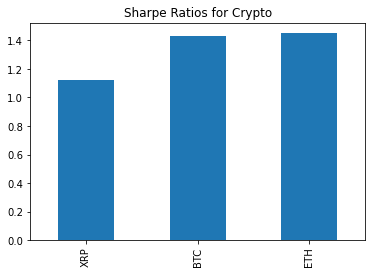

In [40]:
sharpe_crypto.plot(kind='bar', title='Sharpe Ratios for Crypto')

## Beta

In [41]:
allstock_returns.head()

,S&P 500,KO,PFE,O,GILD,D,MAIN,SBUX,TWTR,WKHS,CTSH
Date,,,,,,,,,,,
2015-12-11,-0.019423,-0.010763,-0.009268,-0.006333,-0.025431,-0.004755,-0.025873,-0.033457,-0.042020,0.0,-0.020665
2015-12-14,0.004756,0.003548,0.003430,0.014391,0.004799,0.008168,-0.034532,0.002174,0.002817,0.0,0.025047
2015-12-15,0.010619,0.015084,0.002175,0.012262,0.015124,0.011159,-0.001716,0.000834,-0.038523,0.0,-0.001506
2015-12-16,0.014515,0.017646,0.009922,0.025728,0.012743,0.021466,0.007923,0.006335,0.013982,0.0,0.046095
2015-12-17,-0.015041,-0.007529,-0.007062,-0.004685,-0.009292,-0.000592,0.000684,-0.014082,-0.040543,0.0,-0.031726


In [42]:
stock_column_names = allstock_returns.columns.tolist()
stock_column_names.remove("S&P 500")
stock_column_names

['KO', 'PFE', 'O', 'GILD', 'D', 'MAIN', 'SBUX', 'TWTR', 'WKHS', 'CTSH']

In [43]:
data = {}
variance = allstock_returns['S&P 500'].var()

for stock_column_name in stock_column_names:
    covariance = allstock_returns[stock_column_name].cov(allstock_returns['S&P 500'])
    beta = covariance/variance
    data[stock_column_name] = [beta]
data

{'KO': [0.6680977138853533],
 'PFE': [0.7067956484950049],
 'O': [0.8947570192599733],
 'GILD': [0.658054980282822],
 'D': [0.6789989093541573],
 'MAIN': [1.0005683207914955],
 'SBUX': [1.0047491358087306],
 'TWTR': [1.2300546317988001],
 'WKHS': [0.5898495961919378],
 'CTSH': [1.1184479437987913]}

In [44]:
beta_data = pd.DataFrame(data=data, index=["Beta"])

beta_data

,KO,PFE,O,GILD,D,MAIN,SBUX,TWTR,WKHS,CTSH
Beta,0.668098,0.706796,0.894757,0.658055,0.678999,1.000568,1.004749,1.230055,0.58985,1.118448


In [45]:
print(f"""Beta is a measure of volatity relative to the market/S&P 500. 
We would conclude that stock {stock_column_names[0]} is approximately {beta_data["KO"]}
less volatile than the market""")

Beta is a measure of volatity relative to the market/S&P 500. 
We would conclude that stock KO is approximately Beta    0.668098
Name: KO, dtype: float64
less volatile than the market


In [46]:
all_bonds_returns.head()

,VBTLX,BLV,IGLB,TLT
Date,,,,
2015-12-11,0.002292,0.006230,0.000354,0.015843
2015-12-14,-0.001436,-0.013059,-0.011149,-0.013010
2015-12-15,-0.008414,0.000684,0.000537,-0.005404
2015-12-16,0.014500,-0.001482,-0.000538,-0.002552
2015-12-17,-0.016516,0.006050,0.006266,0.011471


In [47]:
bonds_column_names = all_bonds_returns.columns.tolist()
bonds_column_names.remove("VBTLX")
bonds_column_names

['BLV', 'IGLB', 'TLT']

In [48]:
data = {}
variance = all_bonds_returns['VBTLX'].var()

for bonds_column_name in bonds_column_names:
    covariance = all_bonds_returns[bonds_column_name].cov(all_bonds_returns['VBTLX'])
    beta = covariance/variance
    data[bonds_column_name] = [beta]
data

{'BLV': [-0.03124368969135841],
 'IGLB': [0.012336454822643927],
 'TLT': [-0.08330226067292337]}

In [49]:
bonds_beta_data = pd.DataFrame(data=data, index=["Beta"])

bonds_beta_data

,BLV,IGLB,TLT
Beta,-0.031244,0.012336,-0.083302


In [50]:
crypto_pct_change.head() 

,BTC,ETH,XRP
Date,,,
2015-08-08,-0.066484,-0.728249,0.039745
2015-08-09,0.015655,-0.068268,0.039169
2015-08-10,-0.002313,0.009333,-0.006585
2015-08-11,0.022369,0.507323,-0.018171
2015-08-12,-0.014831,0.140075,-0.037248


In [51]:
crypto_column_names = crypto_pct_change.columns.tolist()
crypto_column_names.remove("BTC")
crypto_column_names

['ETH', 'XRP']

In [52]:
data = {}
variance = crypto_pct_change['BTC'].var()

for crypto_column_name in crypto_column_names:
    covariance = crypto_pct_change[crypto_column_name].cov(crypto_pct_change['BTC'])
    beta = covariance/variance
    data[crypto_column_name] = [beta]
data

{'ETH': [0.805516782458223], 'XRP': [0.6461465198758111]}

In [53]:
crypto_beta_data = pd.DataFrame(data=data, index=["Beta"])

crypto_beta_data

,ETH,XRP
Beta,0.805517,0.646147


## Part 2 - Monte Carlo Simulation

In [54]:
#put all data in a single df
all_returns = pd.concat([stocks_close_only, bonds_close_only, all_crypto], 
                        join='inner', axis=1)
all_returns.columns= pd.MultiIndex.from_product([all_returns.columns, 
                                                 ['close']])
all_returns.head()

,KO,PFE,O,GILD,D,MAIN,SBUX,TWTR,WKHS,CTSH,BLV,IGLB,TLT,BTC,ETH,XRP
,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close
2015-12-10,42.74,32.37,48.950,102.63,65.20,30.9200,61.87,25.940,6.4,59.52,88.28,56.4800,121.82,415.479004,0.840396,0.008444
2015-12-11,42.28,32.07,48.640,100.02,64.89,30.1200,59.80,24.850,6.4,58.29,88.83,56.5000,123.75,451.937988,0.929762,0.008441
2015-12-14,42.43,32.18,49.340,100.50,65.42,29.0799,59.93,24.920,6.4,59.75,87.67,55.8701,122.14,444.182007,0.993022,0.007614
2015-12-15,43.07,32.25,49.945,102.02,66.15,29.0300,59.98,23.960,6.4,59.66,87.73,55.9001,121.48,465.321014,1.014150,0.006684
2015-12-16,43.83,32.57,51.230,103.32,67.57,29.2600,60.36,24.295,6.4,62.41,87.60,55.8700,121.17,454.933990,0.991182,0.006755


In [ ]:
all_returns.columns.get_level_values(1)

In [ ]:
#the sum of the weights must equal 1
stock_weight = 0.4 / len(tickers)
stock_weights = []
if stock_weights != len(tickers): 
    stock_weights.append(stock_weight)
    
#stocks_weights = [0.041, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
bonds_weights = [0.1, 0.1, 0.1]
crypto_weights = [0.1, 0.1, 0.1]
fund_weights = stocks_weights + bonds_weights + crypto_weights
weight_total = sum(fund_weights)

if weight_total != 1:
    print('The sum of the weights must equal 1')
else: 
    print('The sum of the weights equals 1 great job!')

In [ ]:
print(stock)

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_15_returns = MCSimulation(
    portfolio_data = all_returns,
    weights = fund_weights,
    num_simulation = 500, # Takes too long to run 1000
    num_trading_days = 252*15)

# Print the simulation input data
MC_15_returns.portfolio_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_15_returns.calc_cumulative_return()

In [ ]:
# Printing the simulation input data
fund_plot = MC_15_returns.plot_simulation()

In [ ]:
# Running a Monte Carlo simulation to forecast 15 years cumulative returns
dist_plot = MC_15_returns.plot_distribution()

### Fund Analysis

In [ ]:
# Summary statistics from the Monte Carlo simulation results
tbl_15 = MC_15_returns.summarize_cumulative_return()

# Print summary statistics
print(tbl_15)

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
init_invst = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_15 = round(tbl_15[-2] * init_invst,2)
ci_upper_15 = round(tbl_15[-1] * init_invst,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${init_invst} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_15} and ${ci_upper_15}")